# 2.3 Exercicis d'introducció a l'OpenCV

## Exercici 1
Fent servir les funcions d'opencv de dibuix, generar imatges similars a:
+ random_lines
+ random_circles
+ opencv_text

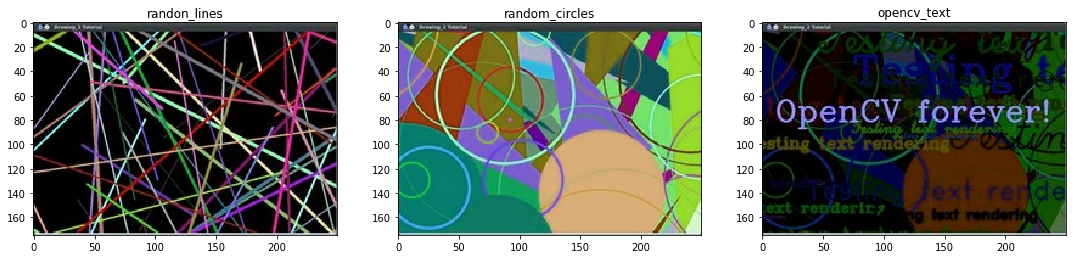

In [8]:
# Fent servir les funcions de dibuix de les OpenCV, crear imatges similars a aquestes:

import cv2
from matplotlib import pyplot as plt

im1 = cv2.imread('Imatges/random_lines.jpg')
im2 = cv2.imread('Imatges/random_circles.jpg')
im3 = cv2.imread('Imatges/opencv_text.jpg')

plt.subplot(1,3,1)
plt.title('randon_lines')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('random_circles')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('opencv_text')
plt.imshow(im3)

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)



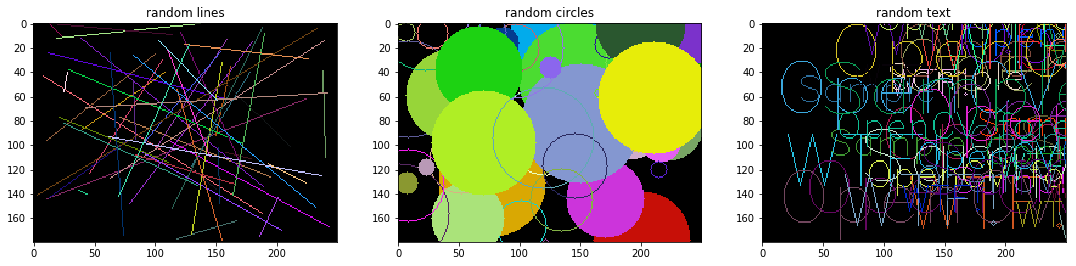

In [68]:
import cv2
import numpy as np

image_size = (180, 250, 3)
arr_text = ["WTF!", "OpenCV forever", "Sample", "It's a trap!"]

# Return a random point (x, y) for the shape
def get_point():
    x = np.random.randint(0, high=250, dtype=np.uint8)
    y = np.random.randint(0, high=180, dtype=np.uint8)
    
    return (x, y)

# Return the color for the shape
def get_color():
    return np.random.randint(0, high=255, size=3, dtype=np.uint8)

# Return a random radius for the circle between 1 and 50 px
def get_radius():
    return np.random.randint(1, 50, dtype=np.uint8)

# Return 1 or -1 for a empty circle or a filled circle
def fill_circle():
    return 1 if np.random.random() < 0.5 else -1

def get_text_value():
    return  arr_text[np.random.randint(0, 3, dtype=np.uint8)]

# Return a value between 1 and 3 to scale the text
def get_text_scale():
    return np.random.randint(1,3, dtype=np.uint8)

# Initialize empty images
lines_canvas = np.zeros(image_size, np.uint8)
circles_canvas = np.zeros(image_size, np.uint8)
text_canvas = np.zeros(image_size, np.uint8)



# Draw 50 shapes
for x in range(1, 50):
    cv2.line(lines_canvas, get_point(), get_point(), get_color().tolist())
    cv2.circle(circles_canvas, get_point(), get_radius(), get_color().tolist(), thickness = fill_circle())
    cv2.putText(text_canvas, get_text_value(), get_point(), cv2.FONT_HERSHEY_SIMPLEX, get_text_scale(), get_color().tolist())
    


# Plot the images
plt.subplot(1, 3, 1)
plt.title("random lines")
plt.imshow(lines_canvas)

plt.subplot(1,3,2)
plt.title("random circles")
plt.imshow(circles_canvas)

plt.subplot(1,3,3)
plt.title("random text")
plt.imshow(text_canvas)


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

## Exercici 2: Operacions aritmètiques amb imatges

Fent servir les funcions de les OpenCV i donades les imatges d'entrada _paisatge_ i _text_, generar una imatge similar a  exercici2_resultat




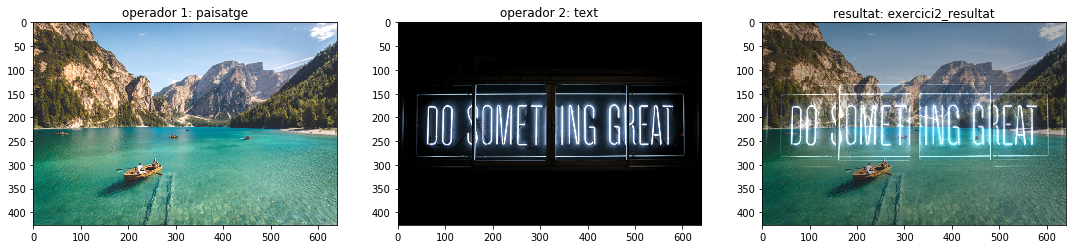

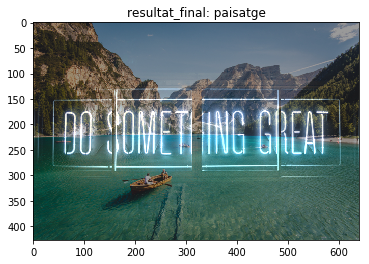

In [12]:
import cv2
from matplotlib import pyplot as plt

im1 = cv2.imread('Imatges/paisatge.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread('Imatges/text.jpg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

im_resultat = cv2.imread('Imatges/exercici2_resultat.jpg')

plt.subplot(1,3,1)
plt.title('operador 1: paisatge')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('operador 2: text')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('resultat: exercici2_resultat')
plt.imshow(im_resultat)

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


#testing*********************************************
#im_final = im1 + im2
im_final = cv2.addWeighted(im1,0.6,im2,0.8,0)

plt.figure()
plt.title('resultat_final: paisatge')
plt.imshow(im_final)

# Exercici 3

Fent servir les funcions de les OpenCV i donades les imatges d'entrada _paisatge_ i _text_, generar una imatge similar a _exercici3_resultat_


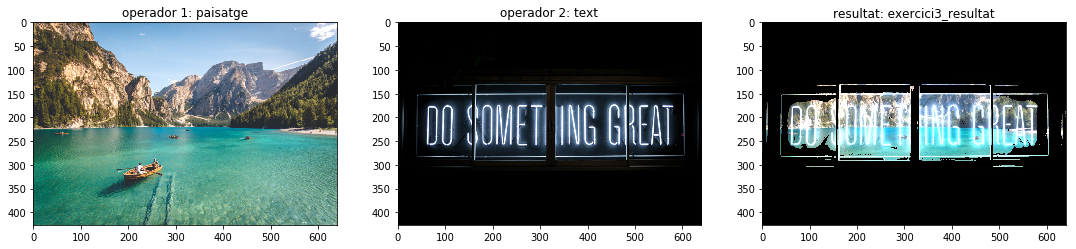

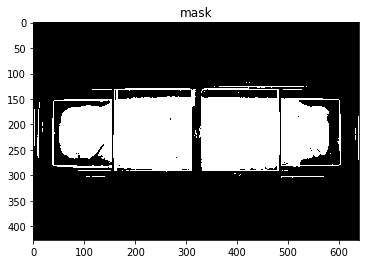

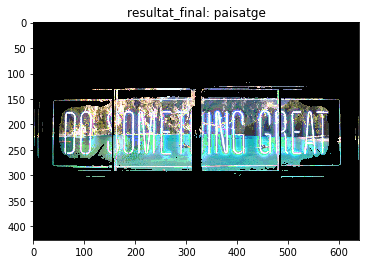

In [2]:
import cv2
from matplotlib import pyplot as plt

im1 = cv2.imread('Imatges/paisatge.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread('Imatges/text.jpg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

resultat = cv2.imread('Imatges/exercici3_resultat.jpg')

plt.subplot(1,3,1)
plt.title('operador 1: paisatge')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('operador 2: text')
plt.imshow(im2, cmap='gray')

plt.subplot(1,3,3)
plt.title('resultat: exercici3_resultat')
plt.imshow(resultat)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


# creació mascara de text image (im2)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(im2_gray, 20, 255, cv2.THRESH_BINARY)
plt.figure()
plt.title('mask')
plt.imshow(mask, cmap='gray')
#mask = cv2.bitwise_not(mask)

im_final = cv2.bitwise_or(im2,im1,mask = mask)

plt.figure()
plt.title('resultat_final: paisatge')
plt.imshow(im_final)


# Exercicis de segmentació d'imatges


## Exercici 4
Donada la imatge 'Imatges/Edifici.jpg', aplicar algun mètode per comptar el nombre de quadrats dins les finestres de l'edifici.

![](Imatges/Edifici.jpg)



175

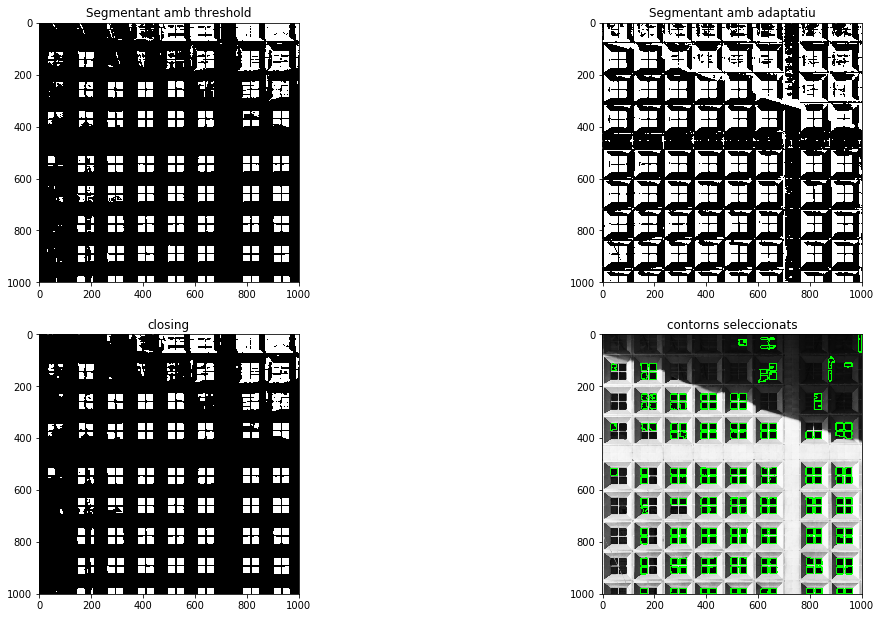

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#OBRO LA IMATGE DIRECTAMENT EN ESCALA DE GRIS
im1 = cv2.imread('Imatges/Edifici.jpg',cv2.IMREAD_GRAYSCALE)
im1 = cv2.medianBlur(im1,5)

#THRESHOLD CONVENCIONAL NO FUNCIONA. NECESSITEM ADAPTATIU

'''
#ret2,im_thres = cv2.threshold(im1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret2,im_thres = cv2.threshold(im1,10,255,cv2.THRESH_BINARY)
plt.plot()
plt.imshow(im_thres, cmap='gray')
plt.title("Segmentant amb threshold")
'''


#THRESHOLD ADAPTATIU
ret2,im_thres = cv2.threshold(im1,15,255,cv2.THRESH_BINARY_INV)

im_adap = cv2.adaptiveThreshold(im1, 255, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV,
                            blockSize=105, C=2)
plt.subplot(2,2,1)
plt.imshow(im_thres, cmap='gray')
plt.title("Segmentant amb threshold")

plt.subplot(2,2,2)
plt.imshow(im_adap, cmap='gray')
plt.title("Segmentant amb adaptatiu")


#MORFOLOGIA:  CLOSING = ERODE+DILATE

kernel = np.ones((5,5), np.uint8)
im_thres = cv2.morphologyEx(im_thres, cv2.MORPH_OPEN, kernel)
#im_thres = cv2.dilate(im_thres,kernel,iterations = 1)
    
plt.subplot(2,2,3)
plt.imshow(im_thres, cmap='gray')
plt.title("closing")


# Busquem blobs blancs
_,contours, _ = cv2.findContours(im_thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Descartem els blobs que tenen una area petita
# per veure altres propietats a extreure:
# https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html
finestres = 0 
selected_contours = []
for c in contours:
    area = cv2.contourArea(c)
    if area > 400 and area < 900:
        selected_contours.append(c)
        finestres = finestres +1

        
# Mostrem els resultats 
# Construim imatge en grisos però amb 3 canals per poder veure la imatge original amb BN amb els blobs en color
im_blobs = np.zeros((im1.shape[0],im1.shape[1],3),dtype = np.uint8)
im_blobs[:,:,0] = im1
im_blobs[:,:,1] = im1
im_blobs[:,:,2] = im1
cv2.drawContours(im_blobs, selected_contours, -1, (0,255,0), 3)

plt.subplot(2,2,4)
plt.imshow(im_blobs)
plt.title("contorns seleccionats")

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

#numero de finestres
finestres

#### Exercici 5
Donada la imatge 'Imatges/face_detection.jpeg', aplicar algun mètode per comptar el nombre de cares.

![](Imatges/face_detection.jpeg)




Detections: 38


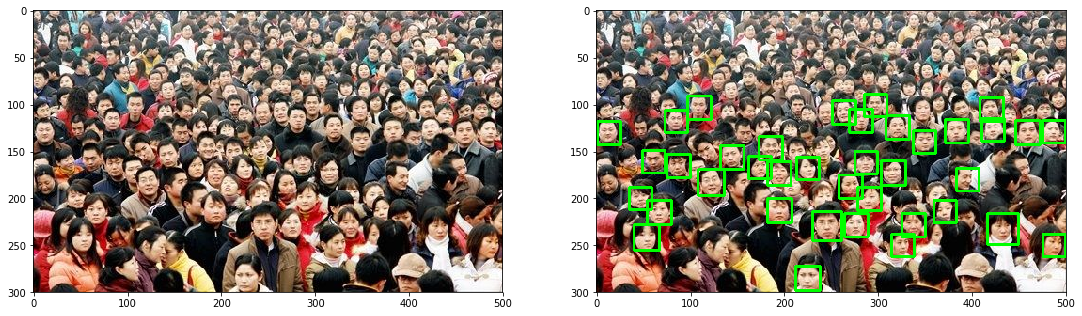

In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("Imatges/face_detection.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#face_cascade = cv2.CascadeClassifier("haarcascade_frontalcatface.xml") # One cat face!
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") # One cat face!

faces, detections = face_cascade.detectMultiScale2(image_gray, scaleFactor = 1.1, minNeighbors = 1)

image_detection = image_rgb.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(image_detection, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
print("Detections: {}".format(len(detections)))

plt.subplot(1,2,1)
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.imshow(image_detection)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

255.0

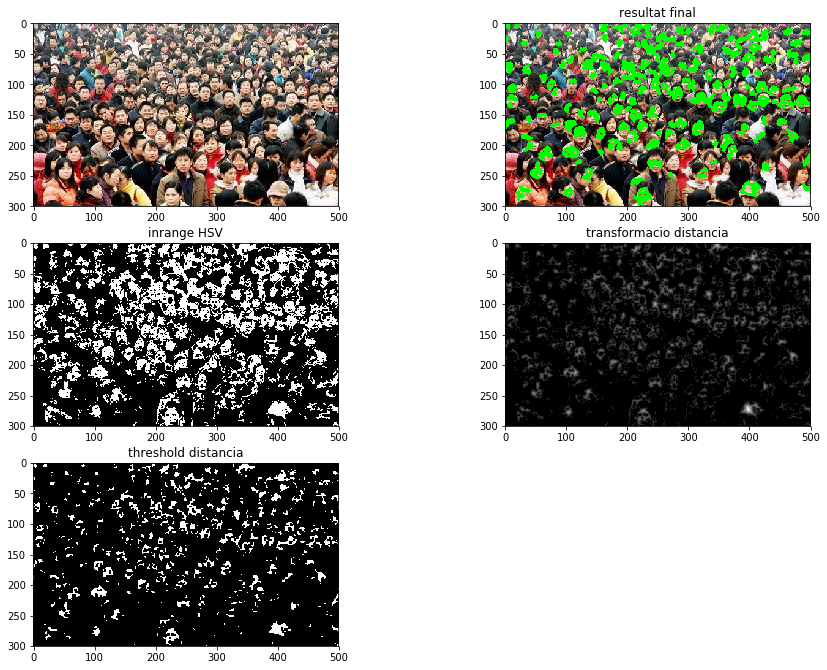

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread("Imatges/face_detection.jpeg")
#passem a RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Passem a espai del color HSV
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

# definim rangs de color  HSV
lower_facecolor = np.array([10,0,0])
upper_facecolor = np.array([17,100,255])
hsv_thres = cv2.inRange(im_hsv, lower_facecolor, upper_facecolor)

# Transformacio de distancia
dist_transform = cv2.distanceTransform(hsv_thres,cv2.DIST_L2,5)
cv2.normalize(dist_transform, dist_transform, 0, 255, cv2.NORM_MINMAX)

# threshold de la imatge distancia
ret, final = cv2.threshold(dist_transform,50,255,cv2.THRESH_BINARY)

# Passem la imatge a unsignedchar
final_8u = final.astype('uint8')

# Busquem blobs blancs
_,contours, _ = cv2.findContours(final_8u, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Descartem els blobs que tenen una area petita
finestres = 0 
selected_contours = []
for c in contours:
    area = cv2.contourArea(c)
    if area > 10:
        selected_contours.append(c)
        finestres = finestres +1

        
# Mostrem els resultats sobre la imatge original
im_blobs =cv2.imread("Imatges/face_detection.jpeg")
im_blobs = cv2.cvtColor(im_blobs, cv2.COLOR_BGR2RGB) 
cv2.drawContours(im_blobs, selected_contours, -1, (0,255,0), 3)




# mostrem resultats
plt.subplot(4,2,1)
plt.imshow(im)


plt.subplot(4,2,2)
plt.title('resultat final')
plt.imshow(im_blobs)

plt.subplot(4,2,3)
plt.title('inrange HSV')
plt.imshow(hsv_thres, cmap='gray')

plt.subplot(4,2,4)
plt.title('transformacio distancia')
plt.imshow(dist_transform, cmap='gray')

plt.subplot(4,2,5)
plt.title('threshold distancia')
plt.imshow(final, cmap='gray')

fig = plt.gcf()
fig.set_size_inches(15.5, 15.5)

dist_transform.max()
